In [3]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

**Scenario Description:**

The catalysed $2^{nd}$ order irreversible liquid phase where $2A \rightarrow B$, is studied in a CSTR reactor with a volume of $V = 8~m^{3}$. The concentration of the porous catalyst particles in the reactor is kept constant at $C_{cat} = 19.4~kg/m^{3}$ for all the different runs. The reactor is operated adiabatically. Other variables than may be assumed constant between the different runs are summarised in the table below:

<img src="CRO410Exam2a.JPG" width="550" />

Results on the steady state operating temperature $(T)$ of the reactor as well as the conversion of A $X_{A}$ are reported for different catalyst particle sizes and different stirrer speeds in the reactor:

<img src="CRO410Exam2b.JPG" width="550" />

1.NBNBNB Declare that this is your own work. Please read the declaration provided in the test canvas and confirm whether it is TRUE/FALSE

In [9]:
V      =      8 #m3
Ccat   =   19.4 #kg/m3
Q      =   0.03 #m3/s
CAo    =     25 #kmol/m3
CBo    =      0 #kmol/m3
To     =    350 #K
CpA    =    140 #kJ/(kmol.K)
rhocat =   2300 #kg/m3
De     = 4.5e-9 #m2/s
R      = 8.341 

**2.Based on the results, can you conclude that all the runs are free of any external mass transfer effects? Explain your answer. Give your answer (Yes/No) followed by your explanation in the text box provided.** [3]

NO - temperature effect must be taken into account. At smaller dps reactor operates at higher T's. At larger dp where mass transfer proven to be eliminated, operating T was lower. Not enough evidence for runs at higher T's and lower dps.

---------------------------------------------------------------------

*Regardless of your answer in number 2, you may now assume that all the runs are free of
external diffusion effects for Questions 3 and 4.*

Above statement implies that $C_{A_{b}} = C_{A_{s}}$

**3.What is the heat of reaction $\Delta H_{RX}$ in units of $J/mol_{RX}$? Round to a whole number, accuracy $\pm100~J/mol$** [4]

The given reaction is $2A \rightarrow B$, therefore $a=2$ (stoichiometric coefficient used in energy balance that follows)

The energy balance for an adiabatic CSTR:
\begin{align}
T &= T_{0} + \dfrac{(-\Delta H_{RX_{i}})(F_{A_{0}}/a)}{\Sigma_{i}F_{i_{0}}C_{p_{i}}}X_{A} \nonumber \\
&= T_{0} + \dfrac{(-\Delta H_{RX_{i}})(QC_{A_{0}}/2)}{QC_{A_{0}}C_{p_{A}}}X_{A} \nonumber \\
&= T_{0} - \dfrac{(\Delta H_{RX})}{2C_{p_{A}}}X_{A} \nonumber \\
-\dfrac{(\Delta H_{RX})}{2C_{p_{A}}}X_{A} &= T - T_{0} \nonumber \\
\Delta H_{RX} &= \dfrac{2C_{p_{A}}}{X_{A}}(T_{0} - T) \nonumber
\end{align}

In [7]:
dHrx = 2*CpA*(To - 393.8)/0.438 #T and XA read of the 4th run on the table
dHrx

-28000.000000000007

In [8]:
print('The heat of reaction= '+str(dHrx)+' J.mol')

The heat of reaction= -28000.000000000007 J.mol


---------------------------------------------------

**4.What is the true activation energy of this reaction $(E)$ in units of $J/mol$? Round to a whole number (accuracy $ \pm 500~J/mol$)**[8]

In [10]:
from scipy.stats import linregress 

In [16]:
X4  = array([0.7, 0.568, 0.438])
T4  = array([420.0, 406.8, 393.8]) #Kelvin
dp4 = array([1/1000, 1.5/1000, 2/1000]) #m
Rp4 = dp4/2
CA  = CAo*(1 - X4)

Mole balance:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}^{'}W &= 0 \nonumber \\
-r_{A}^{'}W &= F_{A_{0}}X_{A} \nonumber \\
r_{A}^{'} &= -\dfrac{F_{A_{0}}X_{A}}{W}\nonumber 
\end{align}

Where $W = VC_{cat}$

In [18]:
W = V*Ccat
W

155.2

In [19]:
FAo = Q*CAo
FAo

0.75

In [20]:
rAprime = -FAo*X4/W
rAprime

array([-0.00338273, -0.00274485, -0.00211662])

Before beginning the anaylsis, the operating regime for each run needs to be determined using the Weisz-Prater parameter:
\begin{align}
C_{WP} &= \dfrac{-r_{A_{measured}}^{'}\rho_{c}R^{2}}{D_{e}C_{A_{s}}} \nonumber
\end{align}

$C_{A_{s}} = C_{A_{b}} = C_{A}$ (from the criteria set for Q3 and Q4

In [21]:
Cwp = -rAprime*rhocat*Rp4**2/(De*CA)
Cwp

array([57.63172967, 73.06880011, 76.99856917])

All three runs provide $C_{WP} > 50$, which means they are in the internal diffusion regime, therefore falsified kinetics may be employed

Therefore, the following rate equation may be used:
\begin{align}
-r_{A}^{'} &= \dfrac{1}{\rho_{c}^{0.5}}\left(\dfrac{3}{R}\right)\left(\dfrac{2D_{e}}{(n + 1)}\right)^{\dfrac{1}{2}}(k^{'})^{\dfrac{1}{2}}C_{A_{s}}^{\dfrac{n + 1}{2}} \nonumber
\end{align}
where the order $n = 2$

Therefore
\begin{align}
k^{'} &= \left[ -r_{A}^{'}\rho_{c}^{0.5}\left(\dfrac{R}{3}\right)\left(\dfrac{3}{2D_{e}}\right)^{\dfrac{1}{2}}C_{A_{s}}^{-\dfrac{3}{2}}  \right]^{2}\nonumber
\end{align}

In [23]:
a = -rAprime*(rhocat**0.5)*Rp4/3
b = (3/(2*De))**0.5
c = CA**(-3/2)
k4prime = (a*b*c)**2
k4prime

array([0.00057764, 0.00028658, 0.0001376 ])

ko= 1336156.4401969244 1/s, EA= 75292.95310909339 J/mol, r^2= 0.9999989954242448


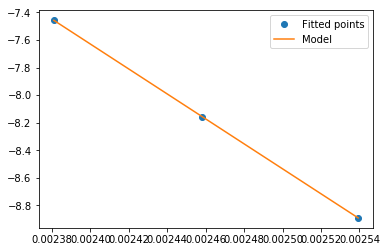

In [26]:
lnk = log(k4prime)

slope, intercept, r_value, p_value, std_err = linregress(1/T4, lnk)

ko = exp(intercept)
EA = -slope*8.314
print('ko=', ko, '1/s,', 'EA=', EA, 'J/mol,', 'r^2=', r_value**2)

Tspan = linspace(T4[2], T4[0])
k = ko*exp(-EA/(8.314*Tspan))

plt.plot(1/T4, lnk, 'o', 1/Tspan, log(k))
plt.legend(['Fitted points', 'Model'])

In [28]:
print('The true activation energy= '+str(EA)+' J/mol')

The true activation energy= 75292.95310909339 J/mol


_______________________________________________________________________

*NBNB – Ignore your answers in 3 and 4 and use an activation energy of $E = 78000~J/mol$ and a heat of reaction of $\Delta H = -35000~J/mol_{RX}$ for Question 5 (Note that these are not necessarily the correct answers – but will be used in the memo for Question 5)*

**5.The stirrer speed in the reactor with $d_{p} = 1.5~mm$ catalyst particles is now halved to $400~rpm$ and a conversion of $X_{A} = 40~\%$ is measured when steady state is reached. If you may still assume that the run at $800~rpm$ is free of any mass transfer effects, determine the external mass transfer coefficient, $k_{c}(m/s)$ for this particle diameter at $400~rpm$. (Round to three significant numbers e.g. 0.00123 or 0.000123)** [7]

In [52]:
Ea2  =  78000 #J/mol
dH1  = -35000 #J/molRX
X1   =  X4[1]
X2   =    0.4
rpm1 =    800
rpm2 = rpm1/2
dp2  = dp4[1]
Rp2  = dp2/2

In [59]:
T1 = T4[1]
T1 

406.8

In [54]:
T2 = To - dH1*X2/(2*CpA)
T2

400.0

In [56]:
CAb2 = CAo*(1 - X2)
CAb2

15.0

In [48]:
am2 = 6/(dp2*rhocat)
am2

1.7391304347826086

In [50]:
rAprime1 = rAprime[1]
rAprime1

-0.002744845360824742

In [49]:
rAprime2 = -FAo*X2/W
rAprime2

-0.00193298969072165

In [57]:
napp = 3/2

In [58]:
kapp1 = -rAprime1/(CA[1]**napp)
kapp1

7.733609675859661e-05

In [61]:
koapp = kapp1*exp(Ea2/(2*R*T1))
koapp

7.587488909487196

In [62]:
kapp2 = koapp*exp(-Ea2/(2*R*T2))
kapp2

6.360966084499812e-05

Using this equation:
\begin{align}
-r_{A}^{'} &= K_{app}^{'}C_{A_{S}}^{n_{app}} \nonumber
\end{align}
we can calculate $C_{A_{S}}$

In [65]:
CAs2 = (-rAprime2/kapp2)**(1/napp)
CAs2

9.738026944170771

At steady state
\begin{align}
-r_{A}^{'} &= k_{C}am(C_{A_{b}} - C_{A_{S}}) \nonumber
\end{align}
to calculate $K_{C}$

In [66]:
kc = -rAprime2/(am2*(CAb2 - CAs2))
kc

0.0002112266749320695

In [67]:
Cwp2 = -rAprime2*rhocat*Rp2**2/(De*CAs2)
Cwp2

57.06849439507248

So $k_{c} = 0.0002~m/s$, and the reaction remains in the internal diffusion regime with $C_{WP} = 57.07$